In [6]:
import numpy as np
import os
from scipy.interpolate import interp1d
from glob import glob as g
import matplotlib.pyplot as plt

In [10]:
names = g('../outputs/*npy')
names

['../outputs\\out_001.npy',
 '../outputs\\out_002.npy',
 '../outputs\\out_003.npy',
 '../outputs\\out_004.npy',
 '../outputs\\out_005.npy',
 '../outputs\\out_006.npy']

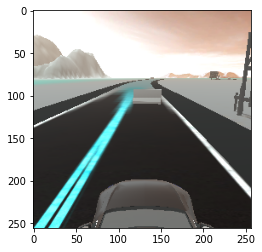

In [11]:
img = np.load(names[0])
plt.imshow(img)

(0.0, 255.0)

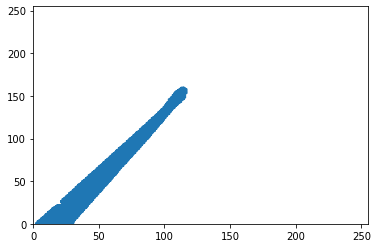

In [245]:
img_where = np.argwhere(img)
x = img_where[:, 1]
y = 255 - img_where[:, 0]
plt.plot(x[::], y[::])
plt.xlim([0, 255])
plt.ylim([0,255])

In [251]:
def interval_avg(x,y):
    num_samples = 10
    step = (x.max() - x.min()) // num_samples
#     intervals = np.
    x = np.sort(x)
    y = np.sort(y)
    intervals = np.arange(x.min(), x.max(), step)
    avgs_x = []
    avgs_y = []
    for i, inter in enumerate(intervals[:-1]):
        avg_y = np.mean(y[(x<intervals[i+1]) & (x>intervals[i])])
        avg_x = np.mean(x[(x<intervals[i+1]) & (x>intervals[i])])
        avgs_x.append(avg_x)
        avgs_y.append(avg_y)
    return [np.array(avgs_x), np.array(avgs_y)]

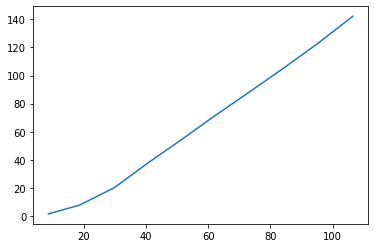

In [252]:
# %%timeit
out = interval_avg(x,y)
plt.plot(out[0], out[1])

In [253]:
out[0] = out[0][~np.isnan(out[0])]
out[1] = out[1][~np.isnan(out[1])]

dx = np.gradient(out[0])
dy = np.gradient(out[1])
dy_dx = dy / dx

In [254]:
angles = np.rad2deg(np.arctan(dy_dx))
print(angles)
print('\nStd : ', angles.std())
print('Mean : ', angles.mean())

[32.05665669 41.35378312 53.77343561 57.73549615 57.37382474 57.200366
 56.90142381 57.53560737 58.92625617 59.83683012]

Std :  8.66593647296945
Mean :  53.26936797639041


In [250]:
45 - np.mean(angles)

-9.75268005702442

In [255]:
angles[-1] - angles[0]

27.780173432246983

In [203]:
# dx_1 = out[0][1:] - out[0][0]
# dy_1 = out[1][1:] - out[1][0]
# dy1_dx1 = dy_1 / dx_1
# angles1 = np.rad2deg(np.arctan(dy1_dx1))
# angles1

array([50.31170464, 54.32886019, 55.32951788])